## Librerías y Paquetes

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. Carga de los dataset

In [2]:
credit_df = pd.read_csv("../data/credit_record.csv")
credit_df

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [3]:
application_df = pd.read_csv('../data/application_record.csv')
application_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,"427,500.00",Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
1,5008805,M,Y,Y,0,"427,500.00",Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
2,5008806,M,Y,Y,0,"112,500.00",Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.00
3,5008808,F,N,Y,0,"270,000.00",Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00
4,5008809,F,N,Y,0,"270,000.00",Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,"135,000.00",Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.00
438553,6840222,F,N,N,0,"103,500.00",Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.00
438554,6841878,F,N,N,0,"54,000.00",Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.00
438555,6842765,F,N,Y,0,"72,000.00",Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.00


## 2. Join de los datos



In [4]:
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
# Actualizar el valor de la columna status por valores numéricos
credit_df['STATUS'] = credit_df['STATUS'].replace({'X':-2, 'C':-1})
credit_df['STATUS'] = credit_df['STATUS'].astype('int')
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,-2
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,-1


In [6]:
# Encontramos el último mes
credit_last_month = credit_df.groupby('ID', as_index=False).agg({'MONTHS_BALANCE': 'max'})
credit_last_month

,ID,MONTHS_BALANCE
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0
...,...,...
45980,5150482,-11
45981,5150483,0
45982,5150484,0
45983,5150485,0


In [7]:
# Join para obtener el status del último mes
credit_record = pd.merge(credit_last_month, credit_df, how= 'inner', on= ['ID','MONTHS_BALANCE'] )
credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,-2
1,5001712,0,-1
2,5001713,0,-2
3,5001714,0,-2
4,5001715,0,-2
...,...,...,...
45980,5150482,-11,-1
45981,5150483,0,-2
45982,5150484,0,-1
45983,5150485,0,0


In [8]:
# Join entre aplication y creadit para crear el df final
df = pd.merge(application_df, credit_record, how= 'inner', on= ['ID'])
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,"427,500.00",Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00,0,-1
1,5008805,M,Y,Y,0,"427,500.00",Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00,0,-1
2,5008806,M,Y,Y,0,"112,500.00",Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.00,0,-1
3,5008808,F,N,Y,0,"270,000.00",Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00,0,0
4,5008809,F,N,Y,0,"270,000.00",Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00,-22,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,"315,000.00",Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.00,0,5
36453,5149834,F,N,Y,0,"157,500.00",Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.00,0,-1
36454,5149838,F,N,Y,0,"157,500.00",Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.00,0,-1
36455,5150049,F,N,Y,0,"283,500.00",Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.00,0,2


## 2. EDA

In [9]:
df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,"427,500.00",Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00,0,-1
1,5008805,M,Y,Y,0,"427,500.00",Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00,0,-1
2,5008806,M,Y,Y,0,"112,500.00",Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.00,0,-1
3,5008808,F,N,Y,0,"270,000.00",Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00,0,0
4,5008809,F,N,Y,0,"270,000.00",Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00,-22,-2
5,5008810,F,N,Y,0,"270,000.00",Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00,0,-1
6,5008811,F,N,Y,0,"270,000.00",Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00,0,-1
7,5008812,F,N,Y,0,"283,500.00",Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.00,-4,0
8,5008813,F,N,Y,0,"283,500.00",Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.00,0,0
9,5008814,F,N,Y,0,"283,500.00",Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.00,-1,0


In [10]:
# Renombramos las columnas
df.columns = map(str.lower, df.columns)
df = df.rename(columns= {'id': 'id',
                'code_gender': 'gender',
                'flag_own_car': 'car',
                'flag_own_realty': 'property',
                'cnt_children': 'children',
                'amt_income_total': 'annual_income',
                'name_income_type': 'income_type',
                'name_education_type': 'education_type',
                'name_family_status': 'family_status',
                'name_housing_type': 'housing_type',
                'days_birth': 'birth_date',
                'days_employed': 'employment',
                'flag_mobil': 'mobile_phone',
                'flag_work_phone': 'work_phone',
                'flag_phone': 'phone',
                'flag_email': 'email',
                'occupation_type': 'occupation_type',
                'cnt_fam_members': 'fam_members',
                'months_balance': 'months_balance',
                'status': 'status'})
df.head(10)

,id,gender,car,property,children,annual_income,income_type,education_type,family_status,housing_type,birth_date,employment,mobile_phone,work_phone,phone,email,occupation_type,fam_members,months_balance,status
0,5008804,M,Y,Y,0,"427,500.00",Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00,0,-1
1,5008805,M,Y,Y,0,"427,500.00",Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00,0,-1
2,5008806,M,Y,Y,0,"112,500.00",Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.00,0,-1
3,5008808,F,N,Y,0,"270,000.00",Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00,0,0
4,5008809,F,N,Y,0,"270,000.00",Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00,-22,-2
5,5008810,F,N,Y,0,"270,000.00",Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00,0,-1
6,5008811,F,N,Y,0,"270,000.00",Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00,0,-1
7,5008812,F,N,Y,0,"283,500.00",Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.00,-4,0
8,5008813,F,N,Y,0,"283,500.00",Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.00,0,0
9,5008814,F,N,Y,0,"283,500.00",Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.00,-1,0


In [11]:
len(df)

36457

In [12]:
# Validamos el número de nulos en el df
df.isna().sum()

id                     0
gender                 0
car                    0
property               0
children               0
annual_income          0
income_type            0
education_type         0
family_status          0
housing_type           0
birth_date             0
employment             0
mobile_phone           0
work_phone             0
phone                  0
email                  0
occupation_type    11323
fam_members            0
months_balance         0
status                 0
dtype: int64

In [13]:
# Rename de occupation that are nulls
df['occupation_type'] = df['occupation_type'].fillna('Others')

In [14]:
# Set the birth date and employment as positive values
df['age'] = df['birth_date'].apply(lambda x: round(x/-365, 0))
df['year_of_employment'] = df['employment'].apply(lambda x: round(x/-365, 0) if x< 0 else 0)

df = df.drop(columns=['birth_date','employment'])

In [15]:
# Análisis del tipo de datos
df.dtypes

id                      int64
gender                 object
car                    object
property               object
children                int64
annual_income         float64
income_type            object
education_type         object
family_status          object
housing_type           object
mobile_phone            int64
work_phone              int64
phone                   int64
email                   int64
occupation_type        object
fam_members           float64
months_balance          int64
status                  int32
age                   float64
year_of_employment    float64
dtype: object

In [16]:
# Análisis de variables numéricas
df[['annual_income','fam_members', 'age', 'year_of_employment']].describe()

,annual_income,fam_members,age,year_of_employment
count,"36,457.00","36,457.00","36,457.00","36,457.00"
mean,"186,685.74",2.20,43.78,6.04
std,"101,789.23",0.91,11.52,6.49
min,"27,000.00",1.00,21.00,0.00
25%,"121,500.00",2.00,34.00,1.00
50%,"157,500.00",2.00,43.00,4.00
75%,"225,000.00",3.00,53.00,9.00
max,"1,575,000.00",20.00,69.00,43.00


In [17]:
# Análisis de variable categóricas
for column in ['gender','car','property','income_type','education_type','family_status','housing_type','mobile_phone','work_phone','phone','email']:
    print('--------------------')
    print(df[column].value_counts())

--------------------
F    24430
M    12027
Name: gender, dtype: int64
--------------------
N    22614
Y    13843
Name: car, dtype: int64
--------------------
Y    24506
N    11951
Name: property, dtype: int64
--------------------
Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: income_type, dtype: int64
--------------------
Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: education_type, dtype: int64
--------------------
Married                 25048
Single / not married     4829
Civil marriage           2945
Separated                2103
Widow                    1532
Name: family_status, dtype: int64
--------------------
House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment        

### Tratamiento de outliers

La presencia de outliers en problemas de clasificación o regresión puede resultar en una pobre afinación y entrenamiento y por consiguiente en un modelos poco eficiente al momento de realizar una predicción. Por ello se procede con la detección y corrección de valores atípicos en las principales variables numéricas que contiene el dataset


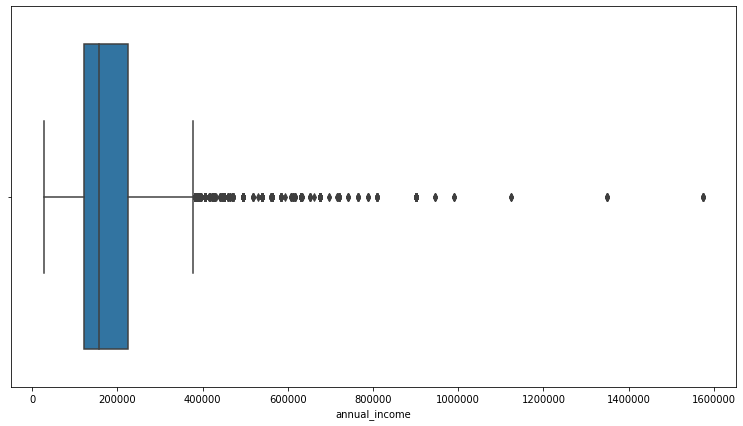

In [18]:
# annual_income
plt.figure(figsize=(13,7))
sns.boxplot(df['annual_income'])

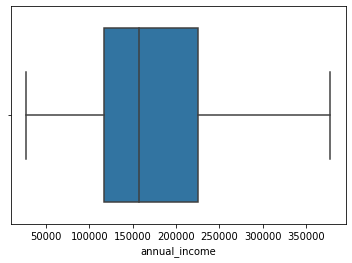

In [19]:
# Aplicamos el método IQR para la corrección de outliers

def remove_outliers(column):
    q_25, q_75 = column.quantile(0.25), column.quantile(0.75)
    iqr = q_75 - q_25
    cut_off = iqr*1.5
    lower, upper = q_25 - cut_off, q_75 + cut_off

    return lower, upper

lower, upper = remove_outliers(df['annual_income'])

df = df.loc[(df['annual_income'] > lower) & (df['annual_income'] < upper)]
sns.boxplot(df['annual_income'])

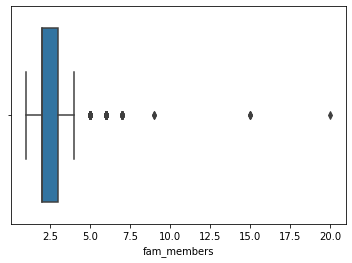

In [22]:
# fam_members
sns.boxplot(df['fam_members'])

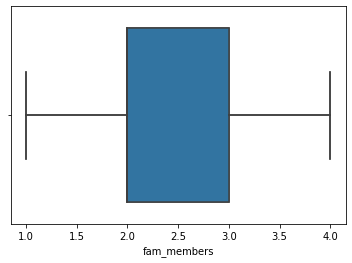

In [23]:
lower, upper = remove_outliers(df['fam_members'])

df = df.loc[(df['fam_members'] > lower) & (df['fam_members'] < upper)]
sns.boxplot(df['fam_members'])

sns.boxplot(df['fam_members'])

### Visualización de datos


ValueError: shape mismatch: objects cannot be broadcast to a single shape

### Etiqueta

In [27]:
df['status'].value_counts()

-1    17052
-2     9079
 0     7997
 1      262
 5       64
 2       18
 3        6
 4        5
Name: status, dtype: int64

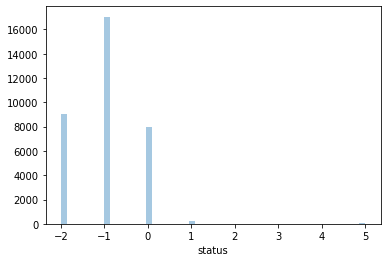

In [29]:
sns.distplot(df['status'], kde= False)

In [31]:
# Variable objetivo o target
# Si status >= 2 entonces 1
# Si status < 2 entonces 0

df['target'] = None
df.loc[df['status'] < 2, 'target'] = 0
df.loc[df['status'] >= 2, 'target'] = 1 
df['target'] = pd.to_numeric(df['target'])
df.head()

,id,gender,car,property,children,annual_income,income_type,education_type,family_status,housing_type,...,work_phone,phone,email,occupation_type,fam_members,months_balance,status,age,year_of_employment,target
2,5008806,M,Y,Y,0,"112,500.00",Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.00,0,-1,59.00,3.00,0
3,5008808,F,N,Y,0,"270,000.00",Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.00,0,0,52.00,8.00,0
4,5008809,F,N,Y,0,"270,000.00",Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.00,-22,-2,52.00,8.00,0
5,5008810,F,N,Y,0,"270,000.00",Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.00,0,-1,52.00,8.00,0
6,5008811,F,N,Y,0,"270,000.00",Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.00,0,-1,52.00,8.00,0
